+ The course is aimed at those with no prior programming experience, and  

+ Each chart uses short and simple code, making seaborn much faster and easier to use than many other data visualization tools (such as Excel, for instance).

In [25]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("Setup Complete")

Setup Complete


In [26]:
raw_train = pd.read_csv('./train.csv')
raw_train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [27]:
raw_train.select_dtypes(exclude = 'object').iloc[2].min()

0.0

In [28]:
corr = raw_train.corr(numeric_only=True).abs()[['SalePrice']]
corr_target = corr.SalePrice
type(corr)
for col in corr.index :
    print(corr.loc[col] > 0.4)
print(corr_target)

SalePrice    False
Name: Id, dtype: bool
SalePrice    False
Name: MSSubClass, dtype: bool
SalePrice    False
Name: LotFrontage, dtype: bool
SalePrice    False
Name: LotArea, dtype: bool
SalePrice    True
Name: OverallQual, dtype: bool
SalePrice    False
Name: OverallCond, dtype: bool
SalePrice    True
Name: YearBuilt, dtype: bool
SalePrice    True
Name: YearRemodAdd, dtype: bool
SalePrice    True
Name: MasVnrArea, dtype: bool
SalePrice    False
Name: BsmtFinSF1, dtype: bool
SalePrice    False
Name: BsmtFinSF2, dtype: bool
SalePrice    False
Name: BsmtUnfSF, dtype: bool
SalePrice    True
Name: TotalBsmtSF, dtype: bool
SalePrice    True
Name: 1stFlrSF, dtype: bool
SalePrice    False
Name: 2ndFlrSF, dtype: bool
SalePrice    False
Name: LowQualFinSF, dtype: bool
SalePrice    True
Name: GrLivArea, dtype: bool
SalePrice    False
Name: BsmtFullBath, dtype: bool
SalePrice    False
Name: BsmtHalfBath, dtype: bool
SalePrice    True
Name: FullBath, dtype: bool
SalePrice    False
Name: HalfBath, d

In [29]:
features = corr_target[corr_target>0.6].index.to_list()

In [30]:
features

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'SalePrice']

***LINE CHART*** : Vẽ biểu đồ Line cho SalePrice dựa trên các cột numeric


In [31]:
num_col = raw_train.select_dtypes(exclude = 'object').columns

label : nhãn của figure  
xlabel, ylabel : nhãn của trục

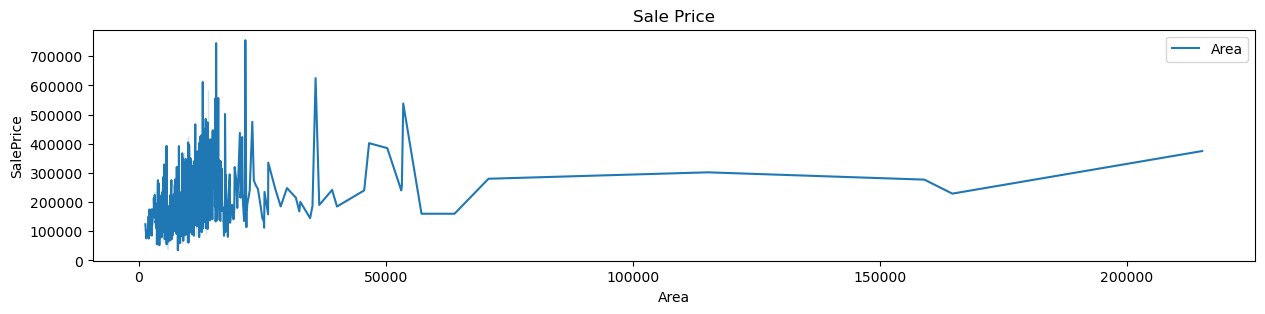

In [33]:
plt.figure(figsize=(15,3))  #theo inch
plt.title("Sale Price")
sns.lineplot(x=raw_train['LotArea'], y = raw_train['SalePrice'], label = 'Area')
plt.xlabel('Area')
plt.show()

In [34]:
plt.close()

***BAR CHART*** 


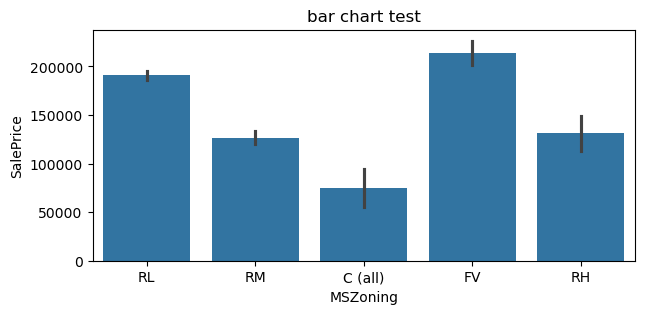

In [35]:
plt.figure(figsize = (7,3))
plt.title('bar chart test')
sns.barplot(x = raw_train['MSZoning'], y = raw_train['SalePrice'])
plt.show()

***HEATMAP***


<Axes: >

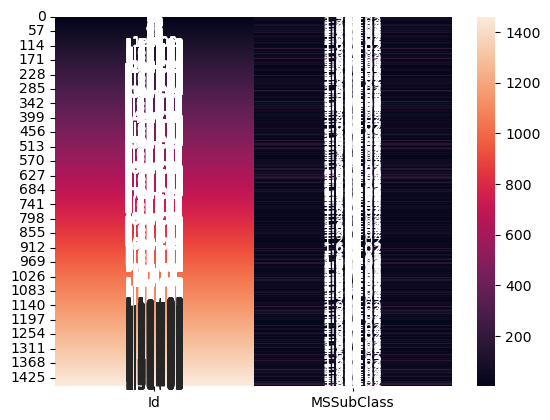

In [41]:
sns.heatmap(data = raw_train[num_col].iloc[:,0:2], annot = True)

***SCATTER PLOT***  
Biểu diễn mối quan hệ giữa 2 biến  
**hue** : color coding 

<Axes: xlabel='LotArea', ylabel='SalePrice'>

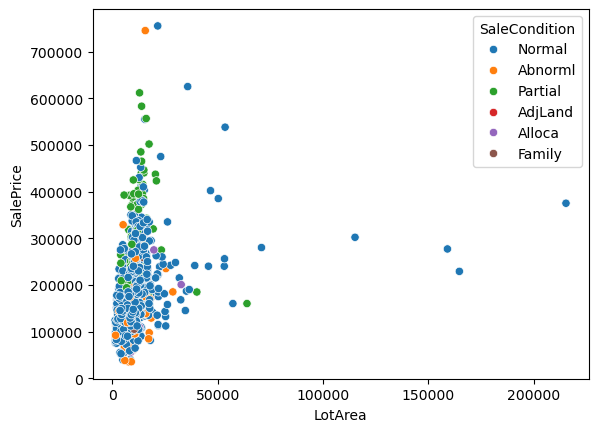

In [46]:
sns.scatterplot(x = raw_train['LotArea'], y = raw_train['SalePrice'], hue = raw_train['SaleCondition'])